<a href="https://colab.research.google.com/github/Legend101Zz/ml-from-scratch/blob/main/makemore_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
words  = open('names.txt','r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [10]:
len(words)

32033

In [11]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [16]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one ?
X, Y = [],[]

for w in words[:5]:
  print(w)
  context = [0] * block_size

  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    print(''.join(itos[i] for i in context), '---> ', itos[ix])
    context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... --->  e
..e --->  m
.em --->  m
emm --->  a
mma --->  .
olivia
... --->  o
..o --->  l
.ol --->  i
oli --->  v
liv --->  i
ivi --->  a
via --->  .
ava
... --->  a
..a --->  v
.av --->  a
ava --->  .
isabella
... --->  i
..i --->  s
.is --->  a
isa --->  b
sab --->  e
abe --->  l
bel --->  l
ell --->  a
lla --->  .
sophia
... --->  s
..s --->  o
.so --->  p
sop --->  h
oph --->  i
phi --->  a
hia --->  .


In [6]:
[0] * 3

[0, 0, 0]

In [17]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [18]:
C = torch.randn((27,2)) # lookup matrix

In [22]:
C[X].shape
# The mechanism: PyTorch iterates over every integer inside X, looks up that row in C, and
# replaces the integer with the row.
# The condition: This only works if every single value inside X is between 0 and 26.

torch.Size([32, 3, 2])

In [23]:
embeddings = C[X]
embeddings.shape

torch.Size([32, 3, 2])

In [24]:
# hidden layer
W1 = torch.randn((6,100))
b1 = torch.randn(100)

# now we want to do embeddings @ W1 + b

In [28]:
# three ways to make embeddings shape to 32*6
# 1
torch.cat([embeddings[:,0,:], embeddings[:,1,:], embeddings[:,2,:]],1)
# 1
torch.cat([embeddings[:,0,:], embeddings[:,1,:], embeddings[:,2,:]],1).shape

torch.Size([32, 6])

In [32]:
# 2. generalised way that can take in any block size
torch.cat(torch.unbind(embeddings,1),1)
# 2
torch.cat(torch.unbind(embeddings,1),1).shape

torch.Size([32, 6])

In [35]:
# 3  best way
embeddings.view(32,6) == torch.cat(torch.unbind(embeddings,1),1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [41]:
# long story short we can do
h = torch.tanh(embeddings.view(-1,6) @ W1 + b1)
h.shape

torch.Size([32, 100])

In [48]:
W2 = torch.randn([100,27])
b2 = torch.randn(27)


In [49]:
logits = h @ W2 + b2

In [50]:
logits.shape

torch.Size([32, 27])

In [51]:
counts = logits.exp()

In [52]:
prob = counts / counts.sum(1,keepdims=True)
prob.shape

torch.Size([32, 27])

In [56]:
loss = -prob[torch.arange(32),Y].log().mean()
loss

tensor(18.4578)

In [58]:
# or
loss = F.cross_entropy(logits,Y)
loss

tensor(18.4578)

In [60]:
# ------------ now made respectable :) ---------------
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
Xtr, Ytr = [], []
for w in words:

  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    Xtr.append(context)
    Ytr.append(ix)
    #print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append

Xtr = torch.tensor(Xtr)
Ytr = torch.tensor(Ytr)
Xtr.shape, Ytr.shape # dataset

(torch.Size([228146, 3]), torch.Size([228146]))

In [61]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [62]:
sum(p.nelement() for p in parameters) # number of parameters in total

11897

In [63]:
for p in parameters:
  p.requires_grad = True

In [66]:
for _ in range(100):
  # forward pass
  emb = C[X] # (32,3,2)
  h = torch.tanh(emb.view(-1,30)@ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Y)
  print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  for p in parameters:
    p.data += -0.1* p.grad

2.4892406463623047
1.954979658126831
1.6265839338302612
1.3682615756988525
1.0798068046569824
0.931341290473938
0.8307843804359436
0.729448139667511
0.4520346522331238
0.3853282332420349
0.3768002986907959
0.3333647847175598
0.3128741383552551
0.3077048063278198
0.3136040270328522
0.29718589782714844
0.29181843996047974
0.2884793281555176
0.28792083263397217
0.2834354043006897
0.28200864791870117
0.2791999280452728
0.2780531942844391
0.2759530544281006
0.2749696969985962
0.27338892221450806
0.2725563943386078
0.2713248133659363
0.270618736743927
0.26962974667549133
0.26902806758880615
0.2682133913040161
0.26769760251045227
0.26701217889785767
0.26656678318977356
0.26598021388053894
0.2655925154685974
0.2650836110115051
0.2647435665130615
0.26429691910743713
0.2639963626861572
0.2636007070541382
0.2633329927921295
0.262979656457901
0.26273947954177856
0.26242196559906006
0.2622051537036896
0.26191797852516174
0.26172107458114624
0.26146015524864197
0.261280357837677
0.26104220747947693


In [67]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [68]:
C = torch.randn((27, 2))

In [69]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [70]:

g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [71]:
sum(p.nelement() for p in parameters) # number of parameters in total

11897

In [72]:

for p in parameters:
  p.requires_grad = True

In [73]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
lri = []
lossi = []
stepi = []

In [74]:
for i in range(200000):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))

  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  #lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

#print(loss.item())

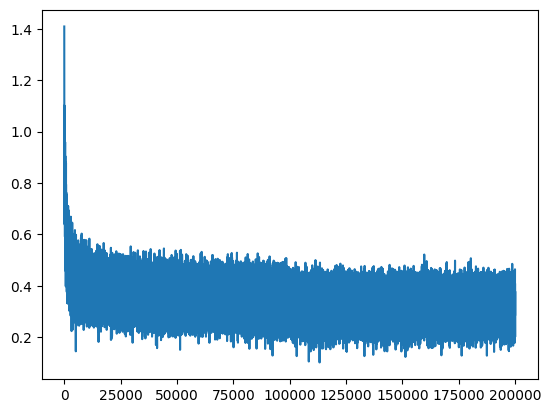

In [75]:
plt.plot(stepi, lossi)

In [76]:
# training loss
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1151, grad_fn=<NllLossBackward0>)

In [77]:
# validation loss
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1591, grad_fn=<NllLossBackward0>)

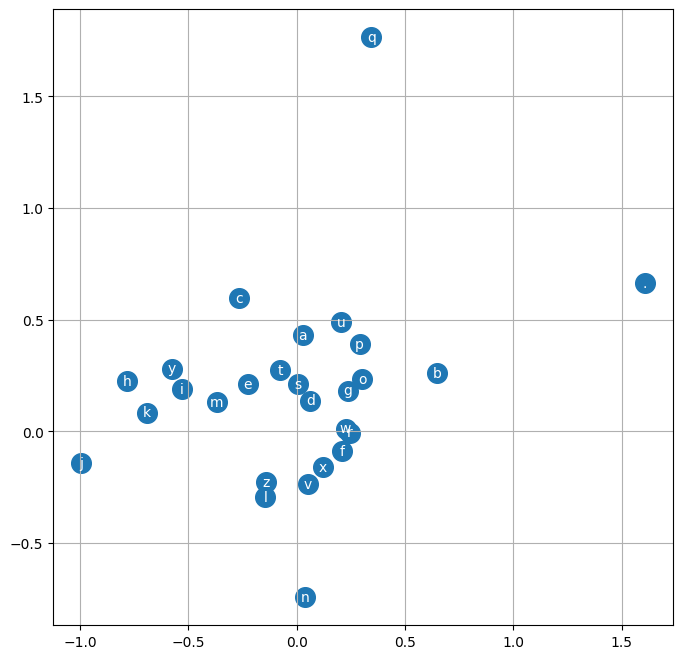

In [78]:

# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [80]:
# predict
context = [0] * block_size
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):

    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break

    print(''.join(itos[i] for i in out))

carmah.
amilli.
khirmiliataly.
skaforden.
zhetn.
amerynco.
aqui.
nermari.
chriiv.
kaleigh.
ham.
pory.
quintis.
lilla.
jamilio.
jero.
dearisi.
jace.
pivra.
mel.
